In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
transaction_data = pd.read_excel('transaction.xlsx')
transaction_data

,Transaction_date,Date-Day,Product,Price,Volume,销售额,Payment_Type,Name,City,State,Country,Account_Created,Last_login
0,43466.059722,1,Product1,1200,5,6000,Mastercard,Nikki,New Rochelle,NY,United States,2019-01-01 00:58:00,2019-01-10 21:31:00
1,43466.077083,1,Product1,1200,6,7200,Mastercard,Si,Holte,Kobenhavn,Denmark,2015-12-14 15:46:00,2019-01-18 04:44:00
2,43466.089583,1,Product1,800,4,3200,Mastercard,Saraya,Dresden,Saxony,Germany,2016-03-12 11:31:00,2019-01-20 11:56:00
3,43466.100000,1,Product1,1200,1,1200,Visa,Lisa,Sugar Land,TX,United States,2019-01-01 01:56:00,2019-01-07 10:52:00
4,43466.160417,1,Product1,1200,9,10800,Mastercard,sunny,Amsterdam,Noord-Holland,Netherlands,2015-09-14 22:53:00,2019-01-17 22:34:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,43496.559722,31,Product1,1200,5,6000,Visa,Joern,Waterford,Ontario,Canada,2018-12-13 18:12:00,2019-02-20 08:27:00
994,43496.642361,31,Product1,1200,4,4800,Visa,Lisa,Ringgold,GA,United States,2019-01-28 09:54:00,2019-02-20 15:53:00
995,43496.758333,31,Product1,250,8,2000,Visa,matthew,Cincinnati,OH,United States,2016-04-02 11:49:00,2019-02-26 12:03:00
996,43496.909722,31,Product1,1200,1,1200,Visa,Sven,Issaquah,WA,United States,2019-01-31 21:01:00,2019-02-03 16:30:00


# Question
## 1. 消费平均单价对省级区域/国家区域的排序，由高到低
Ans: 对单个产品的单价=Price，然后对国家/区域进行groupby之后求mean，即得到消费平均单价

In [14]:
country_avg_price = transaction_data.groupby('Country')['Price'].mean().sort_values(ascending=False)
state_avg_price = transaction_data.groupby('State')['Price'].mean().sort_values(ascending=False)

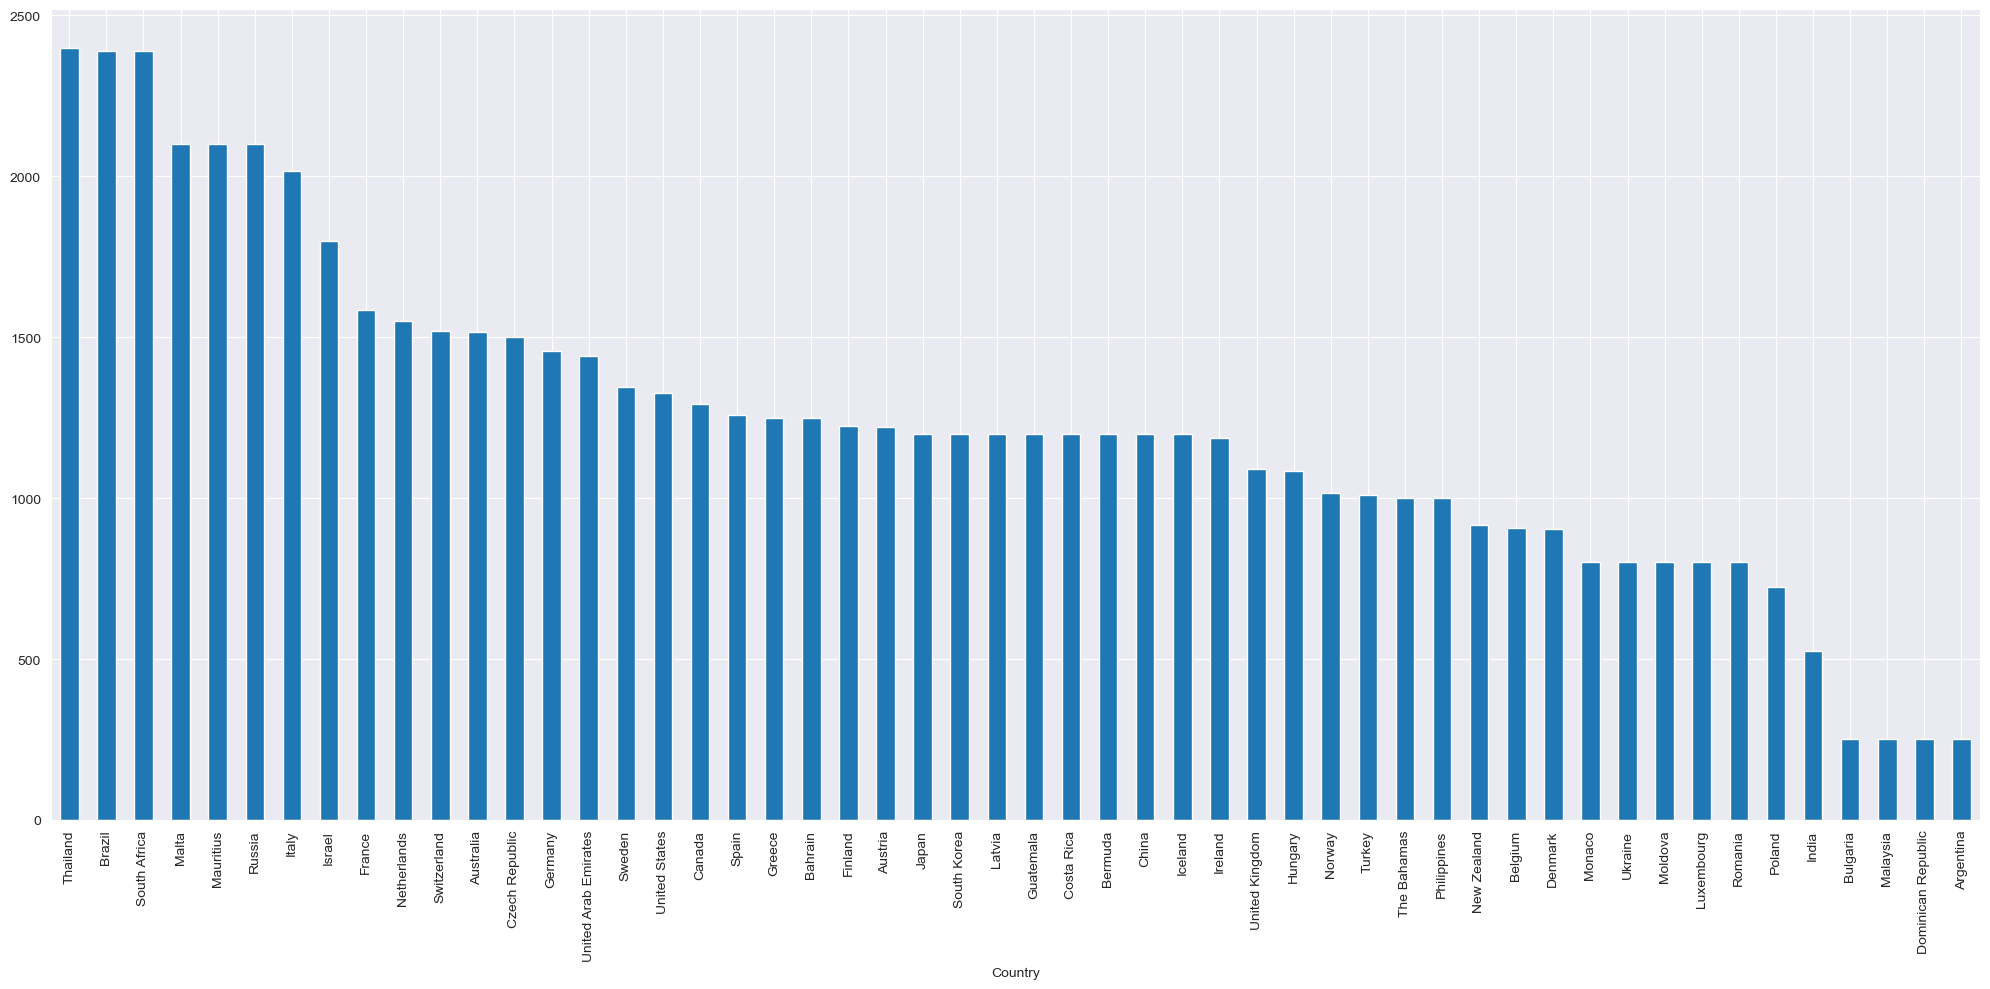

In [20]:
plt.figure(figsize=(20, 10))
country_avg_price.plot(kind='bar')
plt.tight_layout()

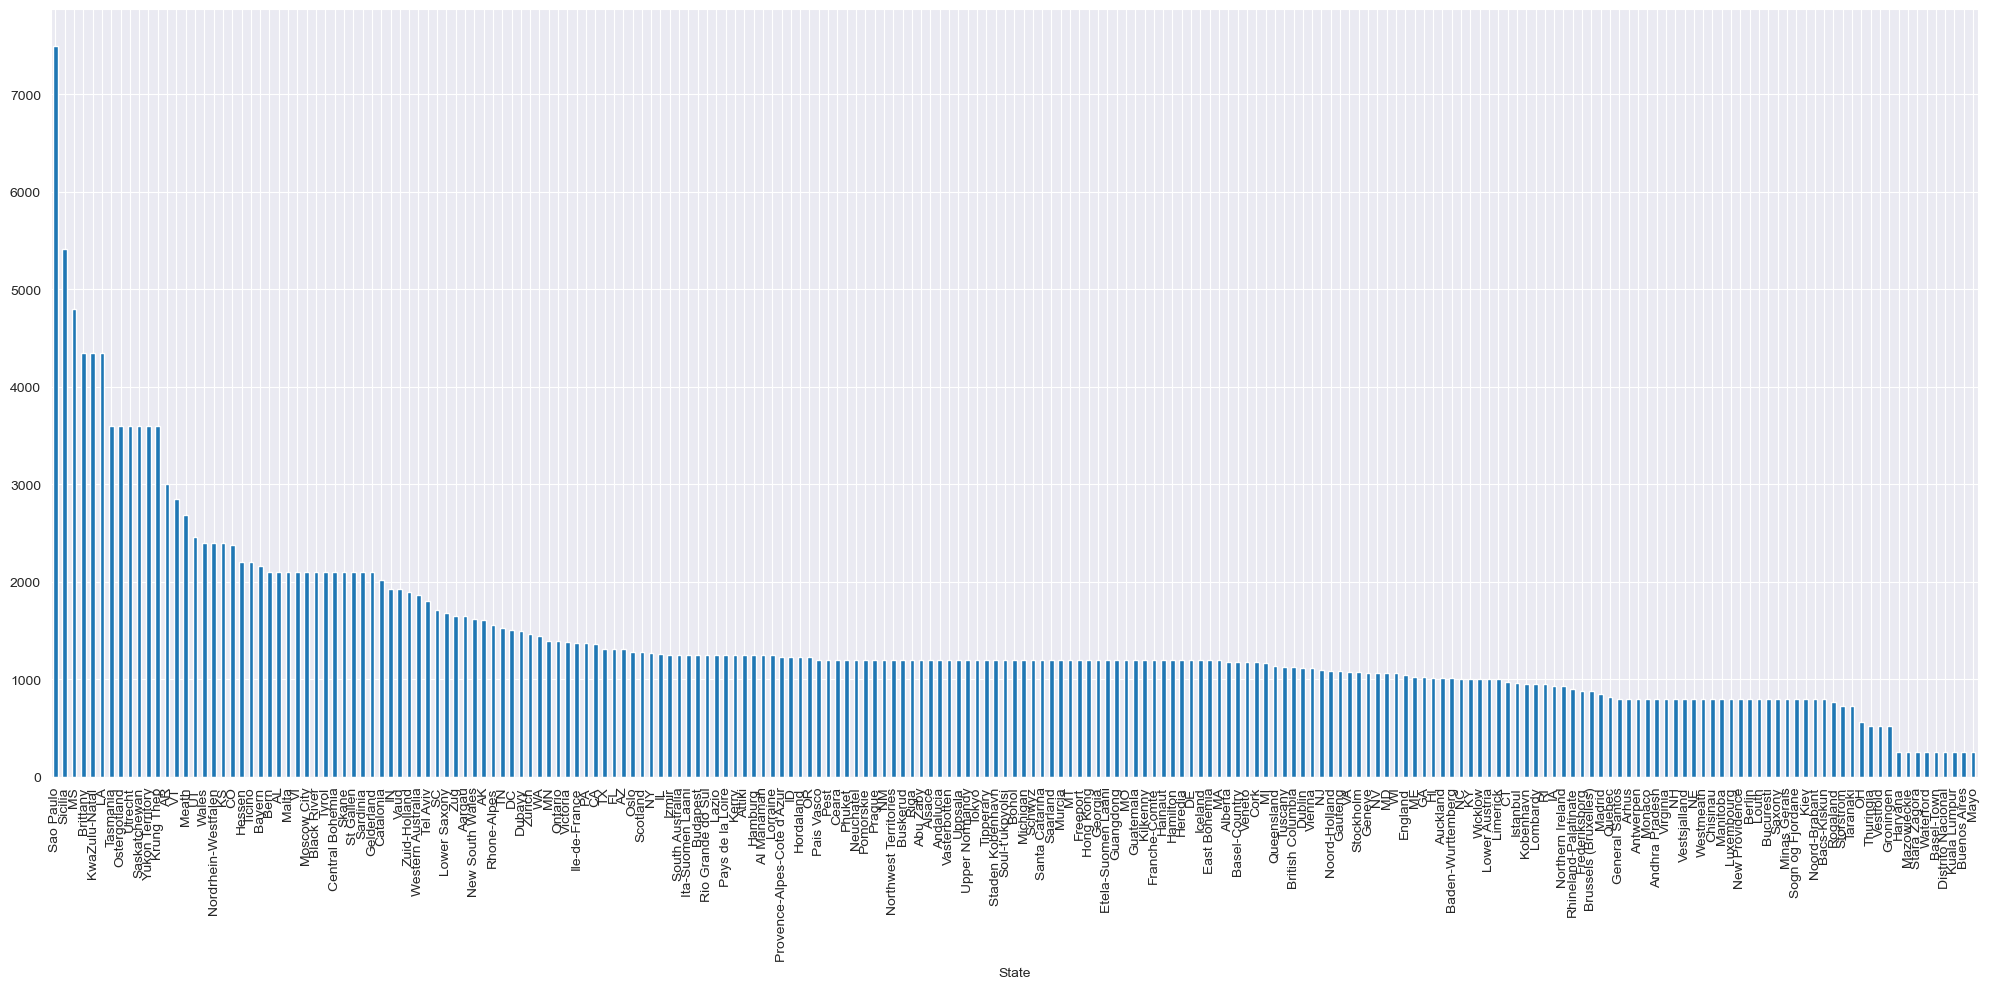

In [19]:
plt.figure(figsize=(20, 10))
state_avg_price.plot(kind='bar')
plt.tight_layout()

## 2. 付款方式是否存在地域性差异


In [21]:
transaction_data

,Transaction_date,Date-Day,Product,Price,Volume,销售额,Payment_Type,Name,City,State,Country,Account_Created,Last_login
0,43466.059722,1,Product1,1200,5,6000,Mastercard,Nikki,New Rochelle,NY,United States,2019-01-01 00:58:00,2019-01-10 21:31:00
1,43466.077083,1,Product1,1200,6,7200,Mastercard,Si,Holte,Kobenhavn,Denmark,2015-12-14 15:46:00,2019-01-18 04:44:00
2,43466.089583,1,Product1,800,4,3200,Mastercard,Saraya,Dresden,Saxony,Germany,2016-03-12 11:31:00,2019-01-20 11:56:00
3,43466.100000,1,Product1,1200,1,1200,Visa,Lisa,Sugar Land,TX,United States,2019-01-01 01:56:00,2019-01-07 10:52:00
4,43466.160417,1,Product1,1200,9,10800,Mastercard,sunny,Amsterdam,Noord-Holland,Netherlands,2015-09-14 22:53:00,2019-01-17 22:34:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,43496.559722,31,Product1,1200,5,6000,Visa,Joern,Waterford,Ontario,Canada,2018-12-13 18:12:00,2019-02-20 08:27:00
994,43496.642361,31,Product1,1200,4,4800,Visa,Lisa,Ringgold,GA,United States,2019-01-28 09:54:00,2019-02-20 15:53:00
995,43496.758333,31,Product1,250,8,2000,Visa,matthew,Cincinnati,OH,United States,2016-04-02 11:49:00,2019-02-26 12:03:00
996,43496.909722,31,Product1,1200,1,1200,Visa,Sven,Issaquah,WA,United States,2019-01-31 21:01:00,2019-02-03 16:30:00


In [37]:
def area_payment_type(df, area_name):
    temp = df.groupby([area_name, 'Payment_Type']).size().unstack().fillna(0)
    temp_pct = temp.div(temp.sum(axis=1), axis=0)
    temp_pct.plot(kind='bar', stacked=True, figsize=(20, 10))
    plt.tight_layout()

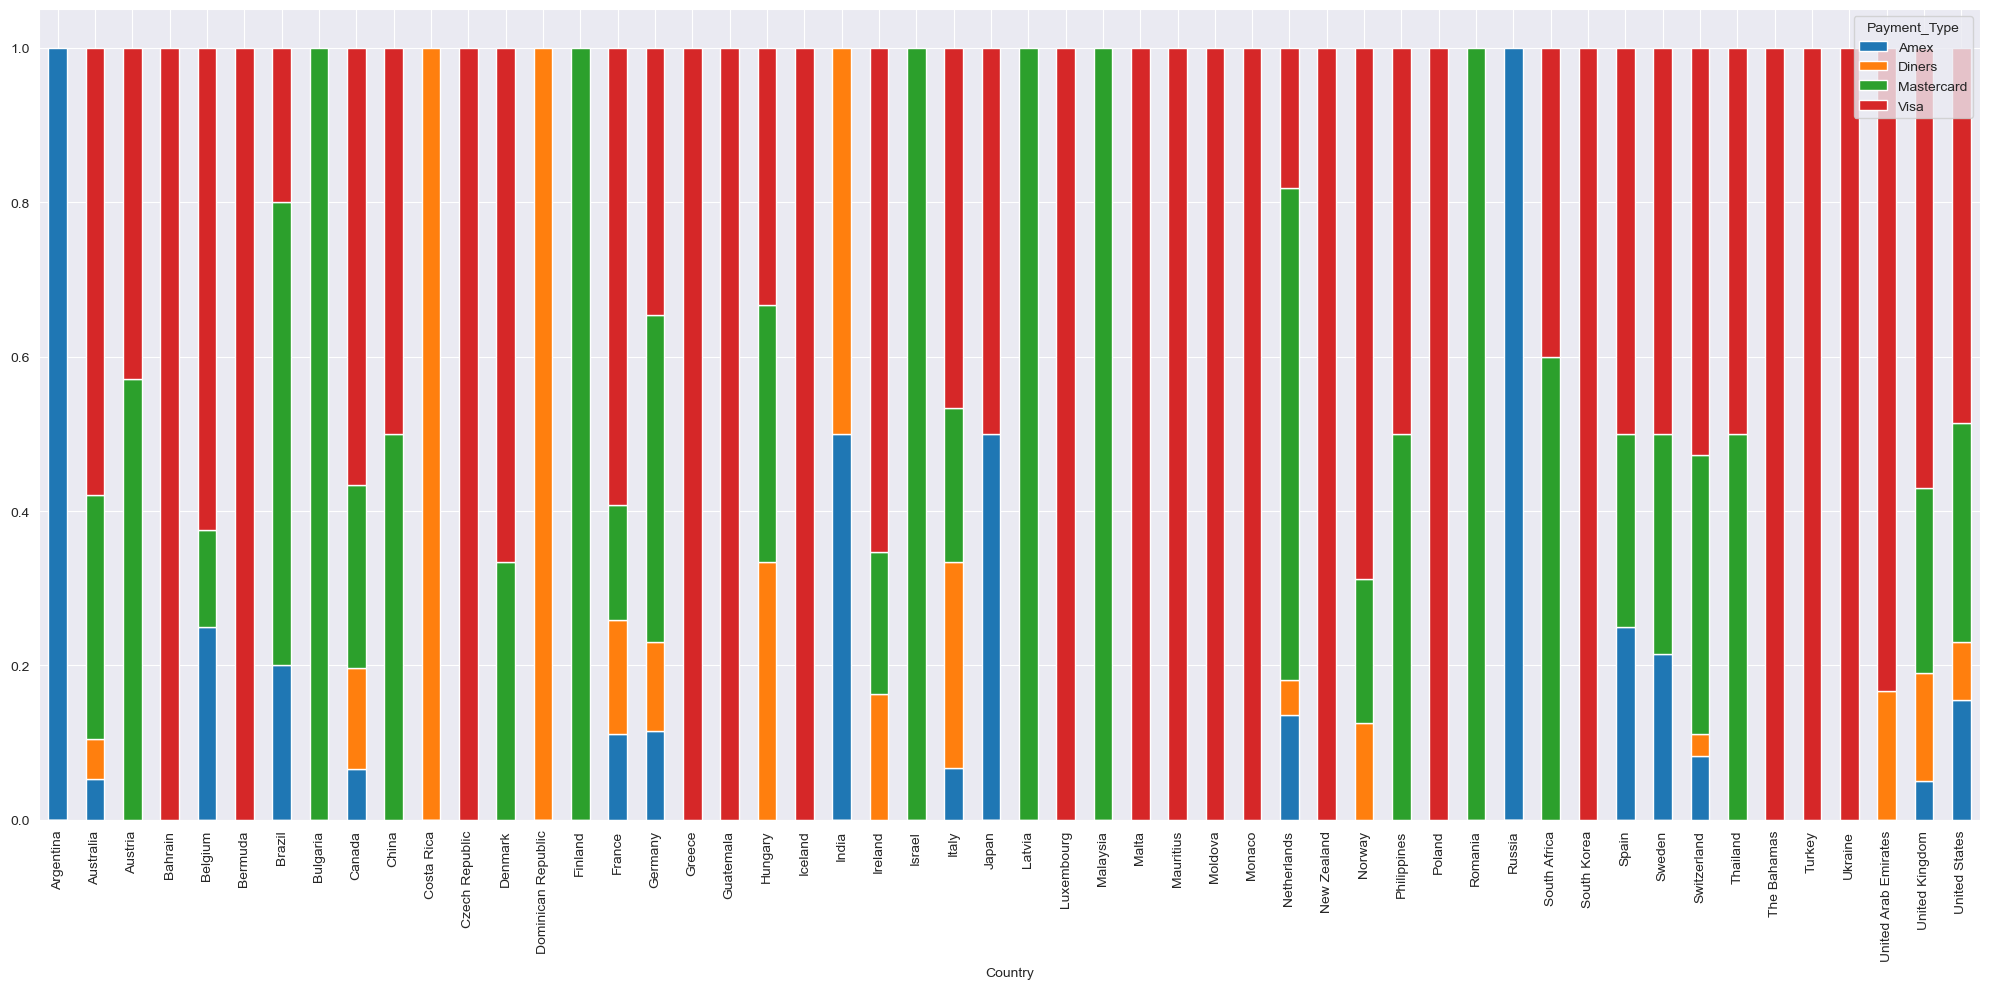

In [38]:
area_payment_type(transaction_data.copy(), 'Country')

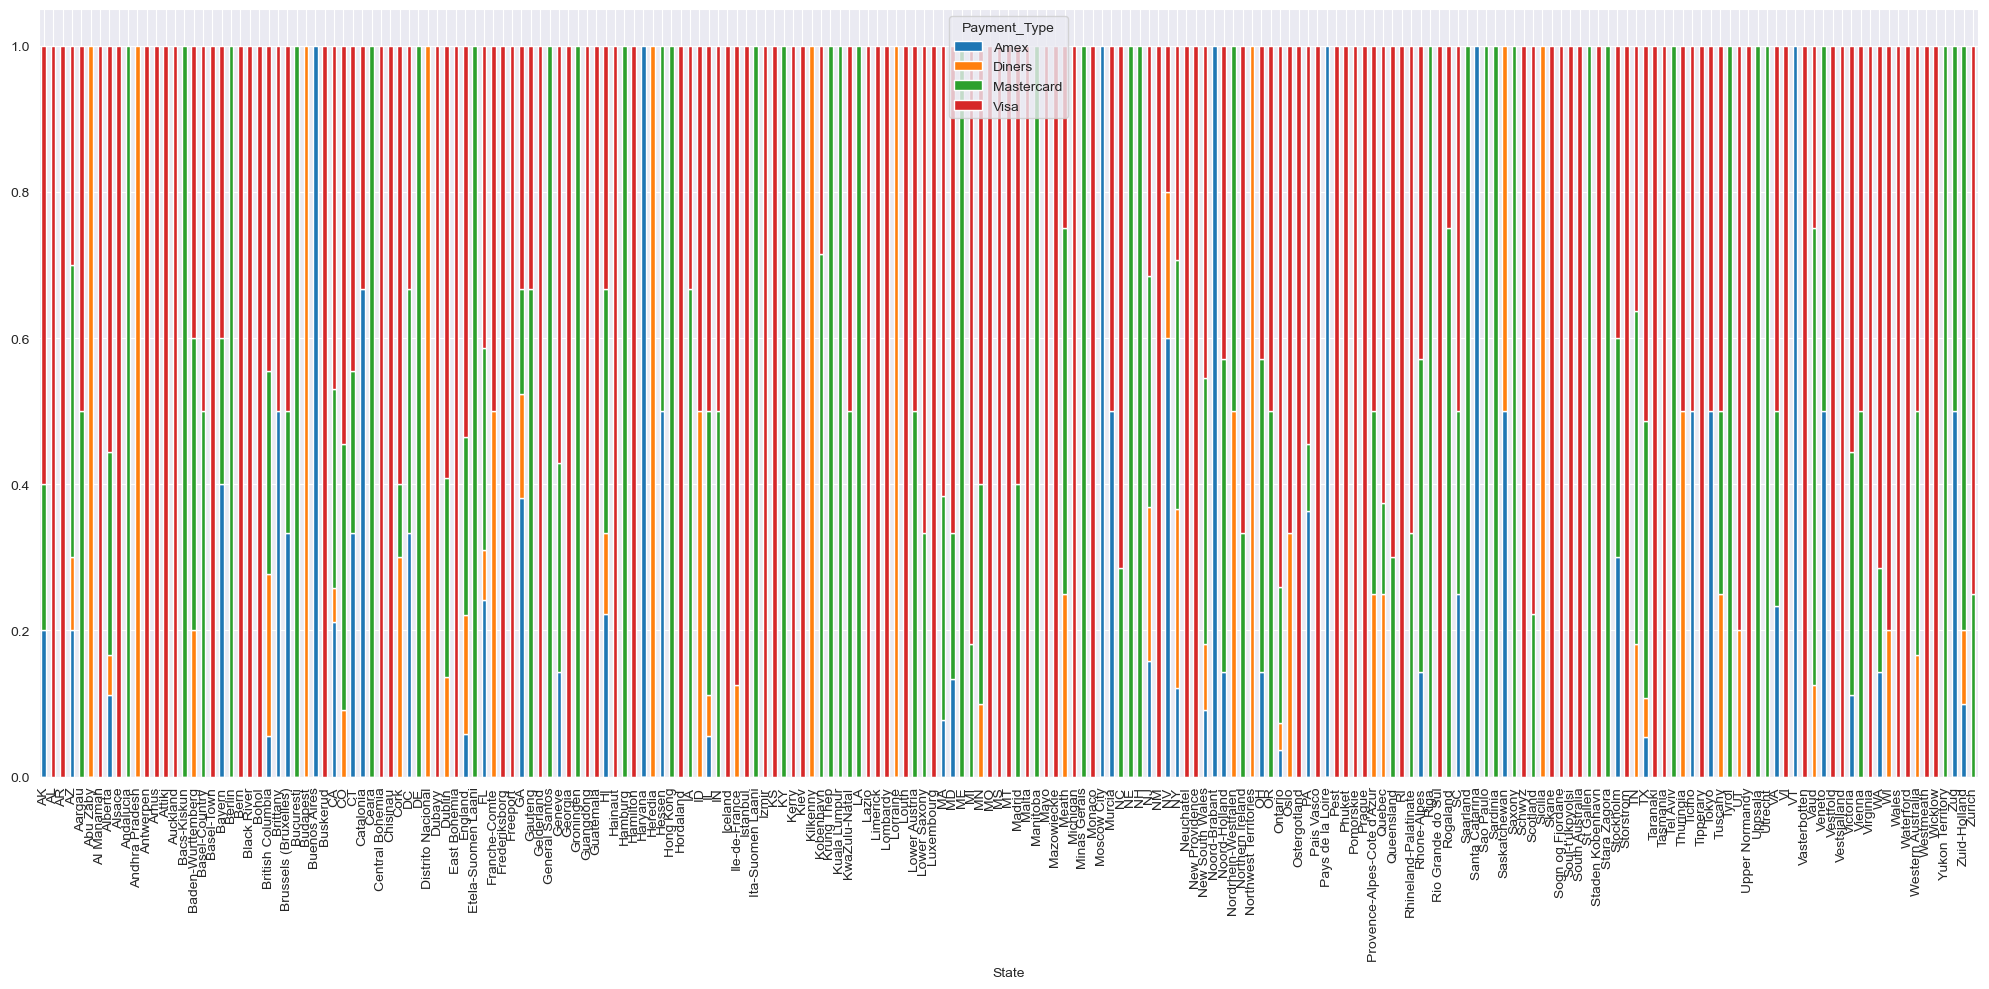

In [39]:
area_payment_type(transaction_data.copy(), 'State')

## Conclusion-Q2
由上图可知，我们通group每个地域的不同付款方式，计算每种方式所占的比例，得出结论：付款方式在不同国家，不同State上存在地域性差异

## 3. 账户的存续时间长短是否与交易额有相关性
## 思路
首先计算存续时间，然后将存续时间与交易额计算Correlation

In [51]:
transaction_data1 = transaction_data.copy()
transaction_data1

,Transaction_date,Date-Day,Product,Price,Volume,销售额,Payment_Type,Name,City,State,Country,Account_Created,Last_login
0,43466.059722,1,Product1,1200,5,6000,Mastercard,Nikki,New Rochelle,NY,United States,2019-01-01 00:58:00,2019-01-10 21:31:00
1,43466.077083,1,Product1,1200,6,7200,Mastercard,Si,Holte,Kobenhavn,Denmark,2015-12-14 15:46:00,2019-01-18 04:44:00
2,43466.089583,1,Product1,800,4,3200,Mastercard,Saraya,Dresden,Saxony,Germany,2016-03-12 11:31:00,2019-01-20 11:56:00
3,43466.100000,1,Product1,1200,1,1200,Visa,Lisa,Sugar Land,TX,United States,2019-01-01 01:56:00,2019-01-07 10:52:00
4,43466.160417,1,Product1,1200,9,10800,Mastercard,sunny,Amsterdam,Noord-Holland,Netherlands,2015-09-14 22:53:00,2019-01-17 22:34:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,43496.559722,31,Product1,1200,5,6000,Visa,Joern,Waterford,Ontario,Canada,2018-12-13 18:12:00,2019-02-20 08:27:00
994,43496.642361,31,Product1,1200,4,4800,Visa,Lisa,Ringgold,GA,United States,2019-01-28 09:54:00,2019-02-20 15:53:00
995,43496.758333,31,Product1,250,8,2000,Visa,matthew,Cincinnati,OH,United States,2016-04-02 11:49:00,2019-02-26 12:03:00
996,43496.909722,31,Product1,1200,1,1200,Visa,Sven,Issaquah,WA,United States,2019-01-31 21:01:00,2019-02-03 16:30:00


In [52]:
transaction_data1['Transaction_date_datetime'] = pd.to_datetime(transaction_data1['Transaction_date'],
                                                                origin='1899-12-31', unit='D')
transaction_data1['account_age_in_days'] = (
            transaction_data1['Transaction_date_datetime'] - transaction_data1['Account_Created']).dt.days
transaction_data1

,Transaction_date,Date-Day,Product,Price,Volume,销售额,Payment_Type,Name,City,State,Country,Account_Created,Last_login,Transaction_date_datetime,account_age_in_days
0,43466.059722,1,Product1,1200,5,6000,Mastercard,Nikki,New Rochelle,NY,United States,2019-01-01 00:58:00,2019-01-10 21:31:00,2019-01-02 01:25:59.999997952,1
1,43466.077083,1,Product1,1200,6,7200,Mastercard,Si,Holte,Kobenhavn,Denmark,2015-12-14 15:46:00,2019-01-18 04:44:00,2019-01-02 01:50:59.999997184,1114
2,43466.089583,1,Product1,800,4,3200,Mastercard,Saraya,Dresden,Saxony,Germany,2016-03-12 11:31:00,2019-01-20 11:56:00,2019-01-02 02:08:59.999996928,1025
3,43466.100000,1,Product1,1200,1,1200,Visa,Lisa,Sugar Land,TX,United States,2019-01-01 01:56:00,2019-01-07 10:52:00,2019-01-02 02:24:00.000000000,1
4,43466.160417,1,Product1,1200,9,10800,Mastercard,sunny,Amsterdam,Noord-Holland,Netherlands,2015-09-14 22:53:00,2019-01-17 22:34:00,2019-01-02 03:51:00.000003072,1205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,43496.559722,31,Product1,1200,5,6000,Visa,Joern,Waterford,Ontario,Canada,2018-12-13 18:12:00,2019-02-20 08:27:00,2019-02-01 13:25:59.999997952,49
994,43496.642361,31,Product1,1200,4,4800,Visa,Lisa,Ringgold,GA,United States,2019-01-28 09:54:00,2019-02-20 15:53:00,2019-02-01 15:24:59.999999232,4
995,43496.758333,31,Product1,250,8,2000,Visa,matthew,Cincinnati,OH,United States,2016-04-02 11:49:00,2019-02-26 12:03:00,2019-02-01 18:11:59.999997440,1035
996,43496.909722,31,Product1,1200,1,1200,Visa,Sven,Issaquah,WA,United States,2019-01-31 21:01:00,2019-02-03 16:30:00,2019-02-01 21:49:59.999997952,1


In [54]:
corr = transaction_data1['account_age_in_days'].corr(transaction_data1['销售额'])
print('相关性: ', corr)

相关性:  0.01277001989275494


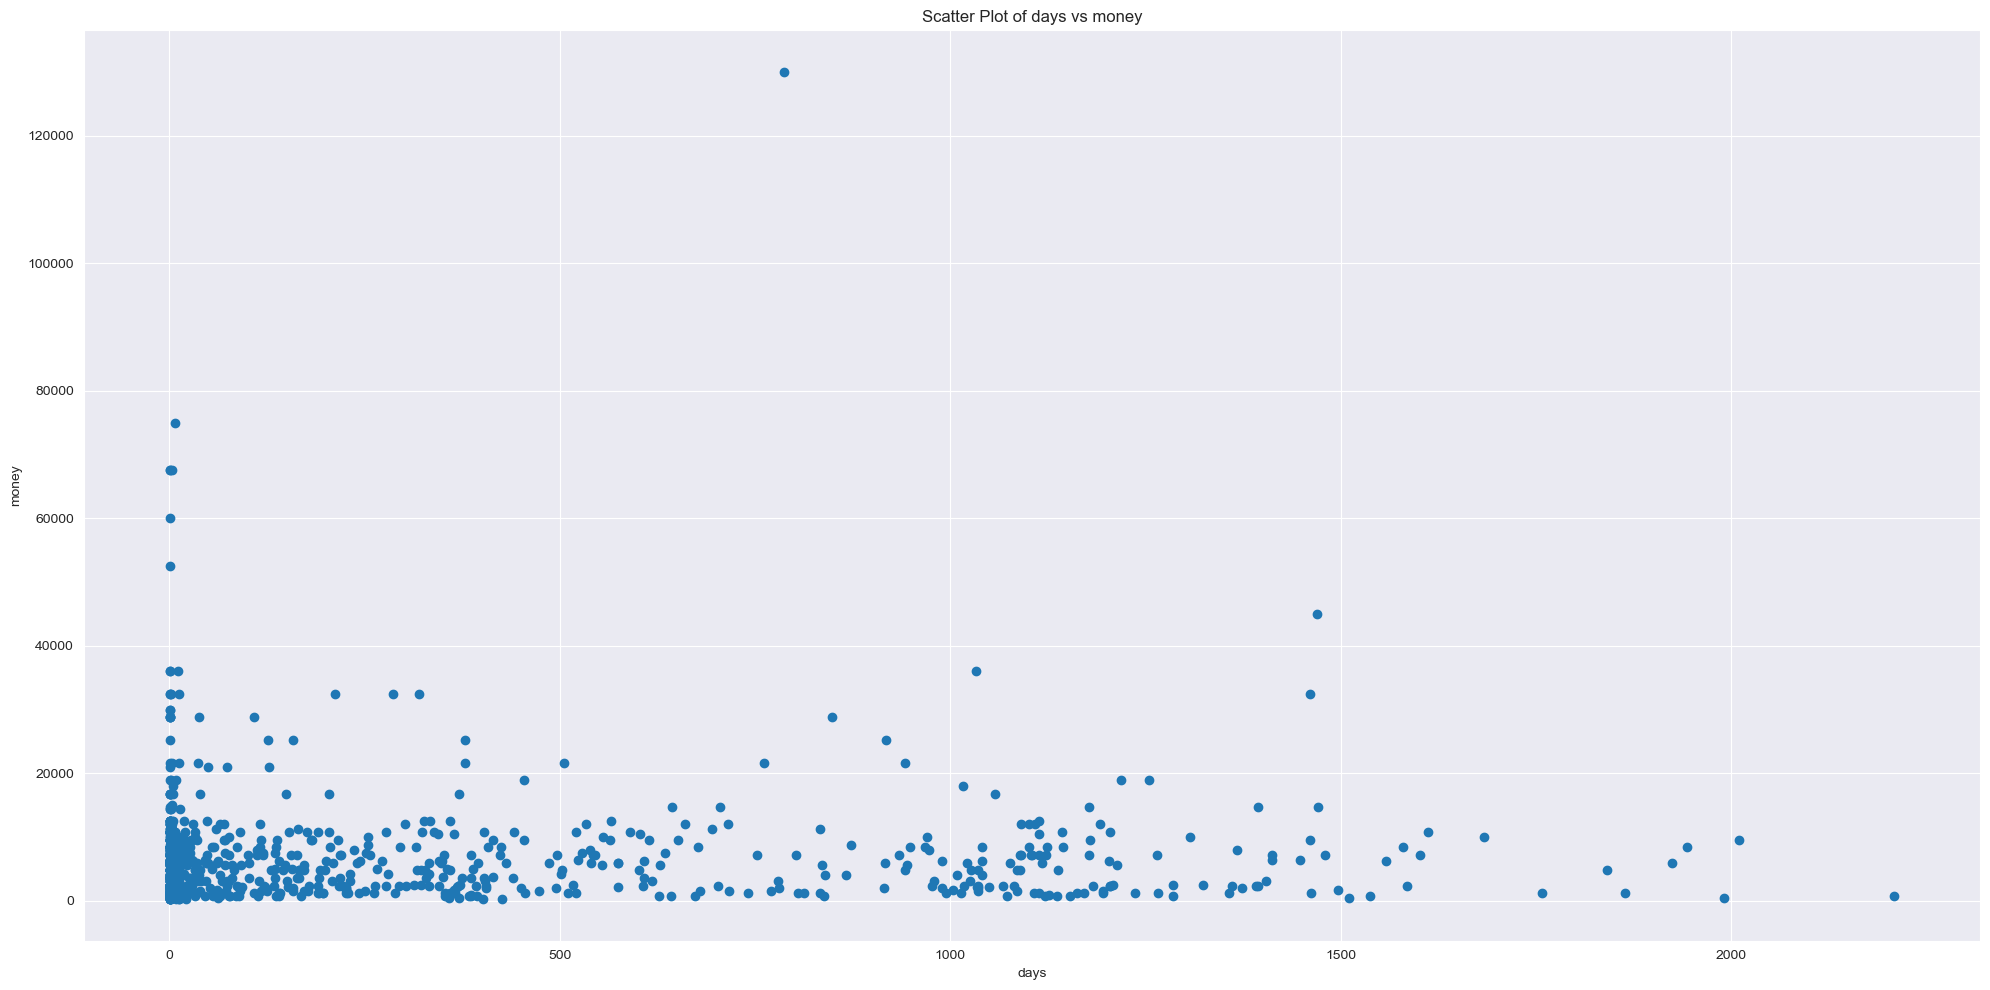

In [58]:
plt.figure(figsize=(20, 10))
plt.scatter(transaction_data1['account_age_in_days'], transaction_data1['销售额'])
plt.xlabel('days')
plt.ylabel('money')
plt.title('Scatter Plot of days vs money')
plt.tight_layout()

## Conclusion - Q3
由上述散点图可知，账户的存续时间长短与交易额不存在明显的相关性关系